
# Project: Movie Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# <u>Introduction</u>

> In this project, I selected a dataset with information on movies registered to "The Movie Database" provided by Udacity. While looking through the data and checking out some of the features provided for each movie, I saw that in the keywords section there were several tags indicating that a movie was an adaption, like 'based on novel' or 'based on play'. I decided it might be interesting to explore how movies apdations from other mediums performed in categories like popularity, ratings, and profit. I also noticed that some production companies showed up many times, like Universal Pictures, and some only had one movie in the database. I was interested to know if there was any correlation between the number of movies a company made and the average profit per movie. Basically, I wanted to know if big production companies that make many movies a year were better at turning a profit due to their resources and experience. 

# <u>Specific questions to ask about the data:</u>
### #1. How do movies adapted from other mediums differ in performance on the basis of average profit, rating, and popularity?

### #2.  Is there a positive correlation between the number of movies made by a production company and their tendency to make profitable movies?

<a id='wrangling'></a>
# <u>Data Wrangling</u>

### Import the necessary packages for the project

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import scipy

### Load Data and use .info() and .head() to get a good sense of the features and values with which we are working

In [22]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [23]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>As you can see above, this dataset has several columns that include multiple strings separated by a '|' character. The only instances of these columns relevant to the questions I posed are the 'keywords' and 'production_companies' columns. For keywords, I will expand these out to make the DataFrame searchable by a specific keyword, like the type of film adaptation. For the production companies column, I will create a new DataFrame with a row for each production per movie

### Check to see how many movies have '0' listed as budget or revenue, as these may be errors

In [24]:
df.query('revenue_adj == 0' or 'budget_adj == 0').shape[0]

6016

## <u>General Properties and Shortcomings of the dataset</u>

>Not every movie listed has a value for keyword or production company, as the movies missing a keyword value is about 1500 and the movies missing a production companies value is about 1000 out of our approximately 10500 movies. This will make our data a bit less reliable, but will still provide a good overall indication

>While we have values for all rows in columns 'popularity', 'vote_average', 'budget_adj' and 'revenue_adj', the number of movies with '0' as the value for either adjusted revenue or adjusted budget is 6016, over half of all the movies in our dataset. After briefly looking through these rows, I have concluded that this must be an error, as some movies have a A-list actors and probably did cost and earn a significant amount of money. This is going to be quite limiting, but if we replace these 0's with the average of the non-zero values in these columns, it may help our analysis and charts to be more accurate

### Impute value in rows where adjusted revenue or budget equals zero with the average of non-zero values. Do this by querying the DataFrame to get the mean where the budget/ revenue is not equal to zero, then use the .replace() function to replace the zero's in each column with the correct mean

In [25]:
budget_mean = df.query('budget_adj != 0')['budget_adj'].mean()
revenue_mean = df.query('revenue_adj != 0')['revenue_adj'].mean()
df = df.replace({'budget_adj':0}, budget_mean)
df = df.replace({'revenue_adj':0}, revenue_mean)
df.query('revenue_adj == 0' or 'budget_adj == 0').shape[0]

0

### Add column for profit (adjusted for inflation) called profit_adj, taken from budget_adj and revenue_adj, which are already adjusted for inflation

In [26]:
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.profit_adj.head()

0    1.254446e+09
1    2.101614e+08
2    1.704191e+08
3    1.718723e+09
4    1.210949e+09
Name: profit_adj, dtype: float64

## Data Cleaning

### Expand keyword column into 5 columns in a new DataFrame and then insert it back into the the original DataFrame to make searchable using the .str.split() function

In [27]:
split_keywords = df['keywords'].str.split('|', expand = True)
split_keywords.shape

(10866, 5)

In [28]:
df[['keyword_1','keyword_2','keyword_3','keyword_4', 'keyword_5']] = split_keywords

### Drop original keyword row since it has been expanded into 5 rows

In [29]:
df = df.drop('keywords', axis = 1)

<a id='eda'></a>
# <u>Exploratory Data Analysis</u>

## Q: **How do movies adapted from other mediums differ in performance on the basis of average profit, rating, and popularity?**

### Use split on keywords column, then mask and .value_counts to check DataFrame for the most frequent types of adaptation to film

In [30]:
keywords = pd.Series()
for c in range(len(split_keywords.columns)):
    keywords = keywords.append(split_keywords[c])

In [31]:
keywords[keywords.str[0:8] == 'based on'].value_counts().head(6)

based on novel         278
based on true story     47
based on comic book     39
based on tv series      29
based on video game     22
based on play           15
dtype: int64

### Since 'based on a true story' is not really an adaptation to film, we'll narrow our search to the other five listed

### Create a function that returns the means of popularity, new DataFrames for each type of adaptation

In [32]:
def get_adaptation_means(medium, data):
    medium_means = pd.Series(index = ['popularity_mean', 'vote_average_mean', 'profit_adj_mean'])
    medium_df = pd.DataFrame()
    if medium == 'overall':
        medium_df = data
    else:
        for i in range(1, 6):
             medium_df = medium_df.append(data[data['keyword_{}'.format(i)] == 'based on {}'.format(medium)])
    
    medium_means.loc['popularity_mean'] = medium_df.popularity.mean()
    medium_means.loc['vote_average_mean'] = medium_df.vote_average.mean()
    medium_means.loc['profit_adj_mean'] = medium_df.profit_adj.mean()
    return medium_means

### Put all popularity, rating, and profit means for all adaptation types into a new DataFrame

In [33]:
mediums = ['novel','comic book', 'tv series', 'video game', 'play', 'overall']
adaptation_means = pd.DataFrame(index = ['popularity_mean', 'vote_average_mean', 'profit_adj_mean'])
for c in mediums:
    adaptation_means[c] = get_adaptation_means(c, df)
adaptation_means

,novel,comic book,tv series,video game,play,overall
popularity_mean,1.188261e+00,1.050024e+00,7.317710e-01,5.644403e-01,4.431209e-01,6.464410e-01
vote_average_mean,6.316906e+00,6.315385e+00,5.768966e+00,4.436364e+00,6.353333e+00,5.974922e+00
profit_adj_mean,9.767828e+07,1.060695e+08,6.595166e+07,5.422284e+07,1.246111e+08,7.818962e+07


### Plot how the different mediums stack up in terms of mean profit, rating, and popularity

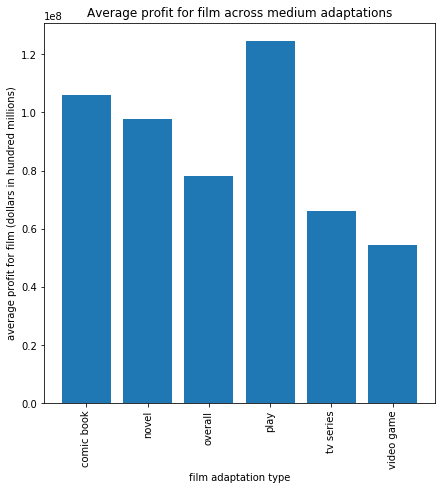

In [34]:
plt.subplots(figsize = (7,7))
plt.bar(adaptation_means.columns, adaptation_means.loc['profit_adj_mean'])
plt.xticks(rotation = 'vertical')
plt.xlabel('film adaptation type')
plt.ylabel('average profit for film (dollars in hundred millions)')
plt.title('Average profit for film across medium adaptations');

>As you can see, films based on plays, novels, and comic books earned a higher profit per average movie than the overall average movie, while tv series and video game movie adaptations typically earn less than the overall average. 

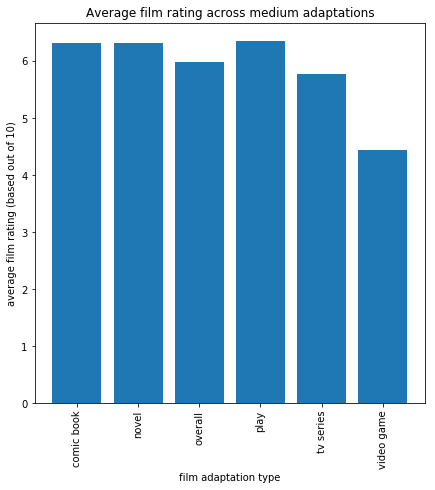

In [35]:
plt.subplots(figsize = (7,7))
plt.bar(adaptation_means.columns, adaptation_means.loc['vote_average_mean'])
plt.xticks(rotation = 'vertical')
plt.xlabel('film adaptation type')
plt.ylabel('average film rating (based out of 10)')
plt.title('Average film rating across medium adaptations');

> The mean movie rating for each medium is actually similar to the overall average, except for movies based on video games, which tradtionally are rated lower.

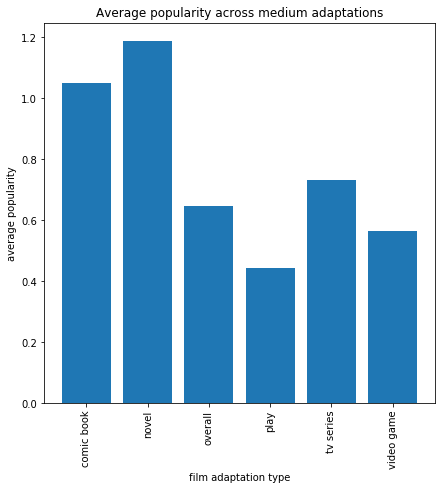

In [36]:
plt.subplots(figsize = (7,7))
plt.bar(adaptation_means.columns, adaptation_means.loc['popularity_mean'])
plt.xticks(rotation = 'vertical')
plt.xlabel('film adaptation type')
plt.ylabel('average popularity')
plt.title('Average popularity across medium adaptations');

> Interestingly, while the average movie based on a play was higher in terms of profit and rating, this visualization shows that it was lower than the overall average in terms of popularity. Novel and comic book adaptations were rated much higher on average popularity than the overall.

## Q: Is there a positive correlation between the number of movies made by a production company and their tendency to make profitable movies?

### Create a DataFrame with new rows for each production company per movie, including the production company and profit for each movie. This is done by using a nested for loop to create one row for each separate production company and then use .dropna() to remove null values

In [37]:
studios = df.production_companies.str.split('|', expand = True)
MAX_STUDIOS = 5
prod_comps_df = pd.DataFrame(index=range(MAX_STUDIOS * len(df)), columns=['production_company', 'profit_adj'])
studios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
0    9836 non-null object
1    6396 non-null object
2    3816 non-null object
3    2053 non-null object
4    1126 non-null object
dtypes: object(5)
memory usage: 424.5+ KB


In [38]:
for c in range(len(df)):
    for i in range(MAX_STUDIOS):
        prod_comps_df['production_company'][c*MAX_STUDIOS + i] = studios.iloc[c, i]
        prod_comps_df['profit_adj'][c*MAX_STUDIOS + i] = df['profit_adj'][c]

### Drop rows with null values and convert column 'profit_adj' to datatype float

In [39]:
prod_comps_df = prod_comps_df.dropna()
prod_comps_df['profit_adj'] = prod_comps_df['profit_adj'].astype(float)

### Plot scatterplot of number of movies per production company and the average profit per film of those companies. Use the groupby function to get the result by each individual production company

> Line on plot indicates line of best fit

Text(0.5,1,'Number of movies in database per production company by average profit per movie')

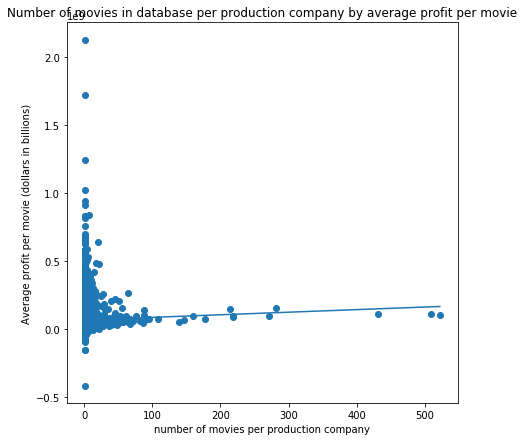

In [42]:
plt.subplots(figsize = (7,7))
plt.scatter(prod_comps_df.groupby('production_company').production_company.count().values, 
            prod_comps_df.groupby('production_company').profit_adj.mean())
plt.plot(np.unique(prod_comps_df.groupby('production_company').production_company.count().values), 
         np.poly1d(np.polyfit(prod_comps_df.groupby('production_company').production_company.count().values,
                              prod_comps_df.groupby('production_company').profit_adj.mean()
                              , 1))(np.unique(prod_comps_df.groupby('production_company').production_company.count().values)))
plt.xlabel('number of movies per production company')
plt.ylabel('Average profit per movie (dollars in billions)')
plt.title('Number of movies in database per production company by average profit per movie')

> As the plot indicates, my initial hypothesis that there was positive correlation between the number of movies a production company has made and the average profit per movie is not well-supported by this data. The line of best fit indicates at best a very weak correlation between these two variables

<a id='conclusions'></a>
## Conclusions

### Shortcomings of the Dataset, subsequent analysis
>- While a 10500 movie sample is sizable and includes some of the most recent popular movies, it may not be indicative of the 100's of thousands of movies that have been released in the real world. Also, since were likely missing a crucial piece of financial informationn (budget or revenue) in over 50% of the data, visualizations and analysis including the adjusted profit variable may not be entirely accurate

### Average profit by Adaptations
>- Films based on novels, plays, and comics were significantly more profitable on average than the average movie in the 'The Movie Database', while movies based on video games typically lost money

### Average rating by Adaptations
>- While most adaptations' average rating is very similar to the overall average, films based on video games were rated lower

### Popularity by Adaptations
>- While films based on plays typically earned a high average profit and rating, they appeared to be less popular than the overall average of TMDb. Movies based on novels, comics, and tv series were more popular on average than the overall film popularity mean

### Production company movie count and mean profit correlation
>- I was unable to detect a definable positive correlation between company movie count and mean profit in this dataset. The line of best fit does not indicate a very strong positive or negative correlation between these two variables
